

#Load libraries

In [1]:
# #Set up google colab working environment
# !git clone https://github.com/zrosen3/Colombian-peso-counterfeit-detection.git
# %cd /content/Colombian-peso-counterfeit-detection/Code
# !pwd

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import tensorflow as tf
import common_functions as cf

# Load data

In [3]:
train_ds, test_ds, validation_ds, class_names =  cf.LoadData(path="../Data/Augmented/", batch_size=12)


Found 24958 files belonging to 13 classes.
Found 8320 files belonging to 13 classes.
Found 8320 files belonging to 13 classes.


## Run MobileNet model

In [4]:
#initialize model
tf.keras.backend.clear_session()
np.random.seed(0)
tf.random.set_seed(0)

#Base mobile net model
inputs = tf.keras.Input(shape=(480, 640, 3))
resized = tf.image.resize(inputs, (224, 224))
x = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, alpha = 0.5)(resized, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Rescaling(1./255)(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(13, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

#Additional classification layer
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=10
)

Epoch 1/10
2080/2080 [==============================] - 146s 59ms/step - loss: 2.0424 - accuracy: 0.2644 - val_loss: 1.7964 - val_accuracy: 0.3291
Epoch 2/10
2080/2080 [==============================] - 123s 59ms/step - loss: 1.6732 - accuracy: 0.3924 - val_loss: 1.5570 - val_accuracy: 0.5120
Epoch 3/10
2080/2080 [==============================] - 125s 60ms/step - loss: 1.4255 - accuracy: 0.5368 - val_loss: 1.3081 - val_accuracy: 0.5112
Epoch 4/10
2080/2080 [==============================] - 124s 59ms/step - loss: 1.1228 - accuracy: 0.6514 - val_loss: 1.0074 - val_accuracy: 0.6591
Epoch 5/10
2080/2080 [==============================] - 127s 61ms/step - loss: 0.8394 - accuracy: 0.8073 - val_loss: 0.7084 - val_accuracy: 0.8706
Epoch 6/10
2080/2080 [==============================] - 124s 60ms/step - loss: 0.5669 - accuracy: 0.9268 - val_loss: 0.4562 - val_accuracy: 0.9561
Epoch 7/10
2080/2080 [==============================] - 124s 60ms/step - loss: 0.3702 - accuracy: 0.9639 - val_loss: 0

Evaluate model

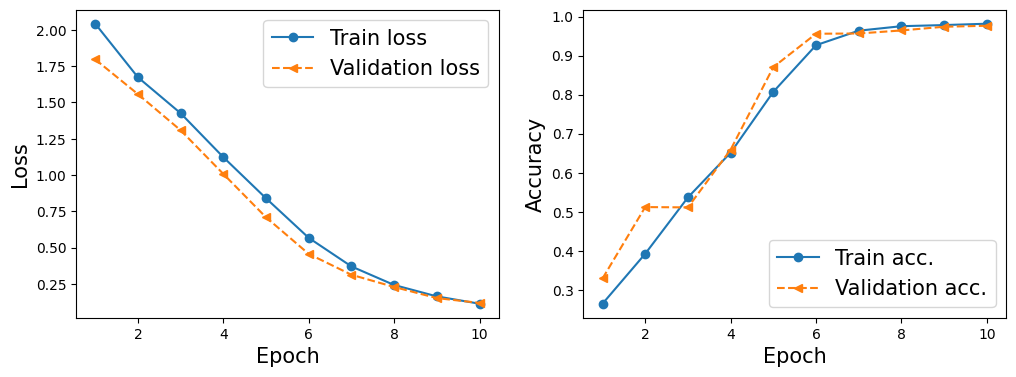

694/694 - 15s - loss: 0.1219 - accuracy: 0.9764 - 15s/epoch - 22ms/step
Test loss: 0.12185029685497284 | Test accuracy: 0.9764423370361328


(0.9817693829536438, 0.9765625, 0.9764423370361328)

In [5]:
cf.EvaluateModel(model, test_ds, history)

Macro averaged precision score: 0.9764423076923077
Macro averaged recall score: 0.9773625513277392
Macro averaged F1 score: 0.976595571564665


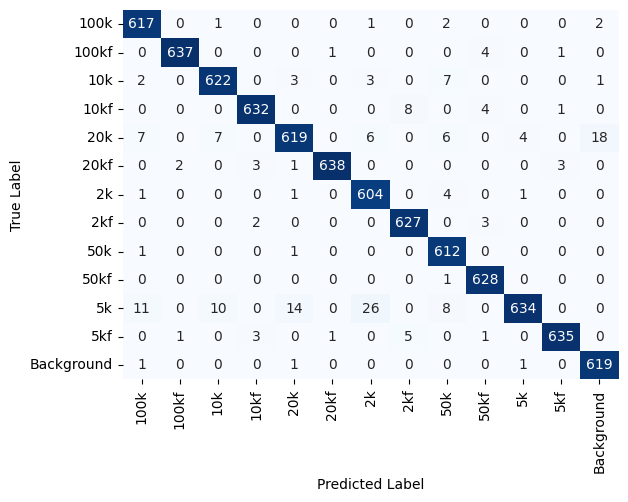

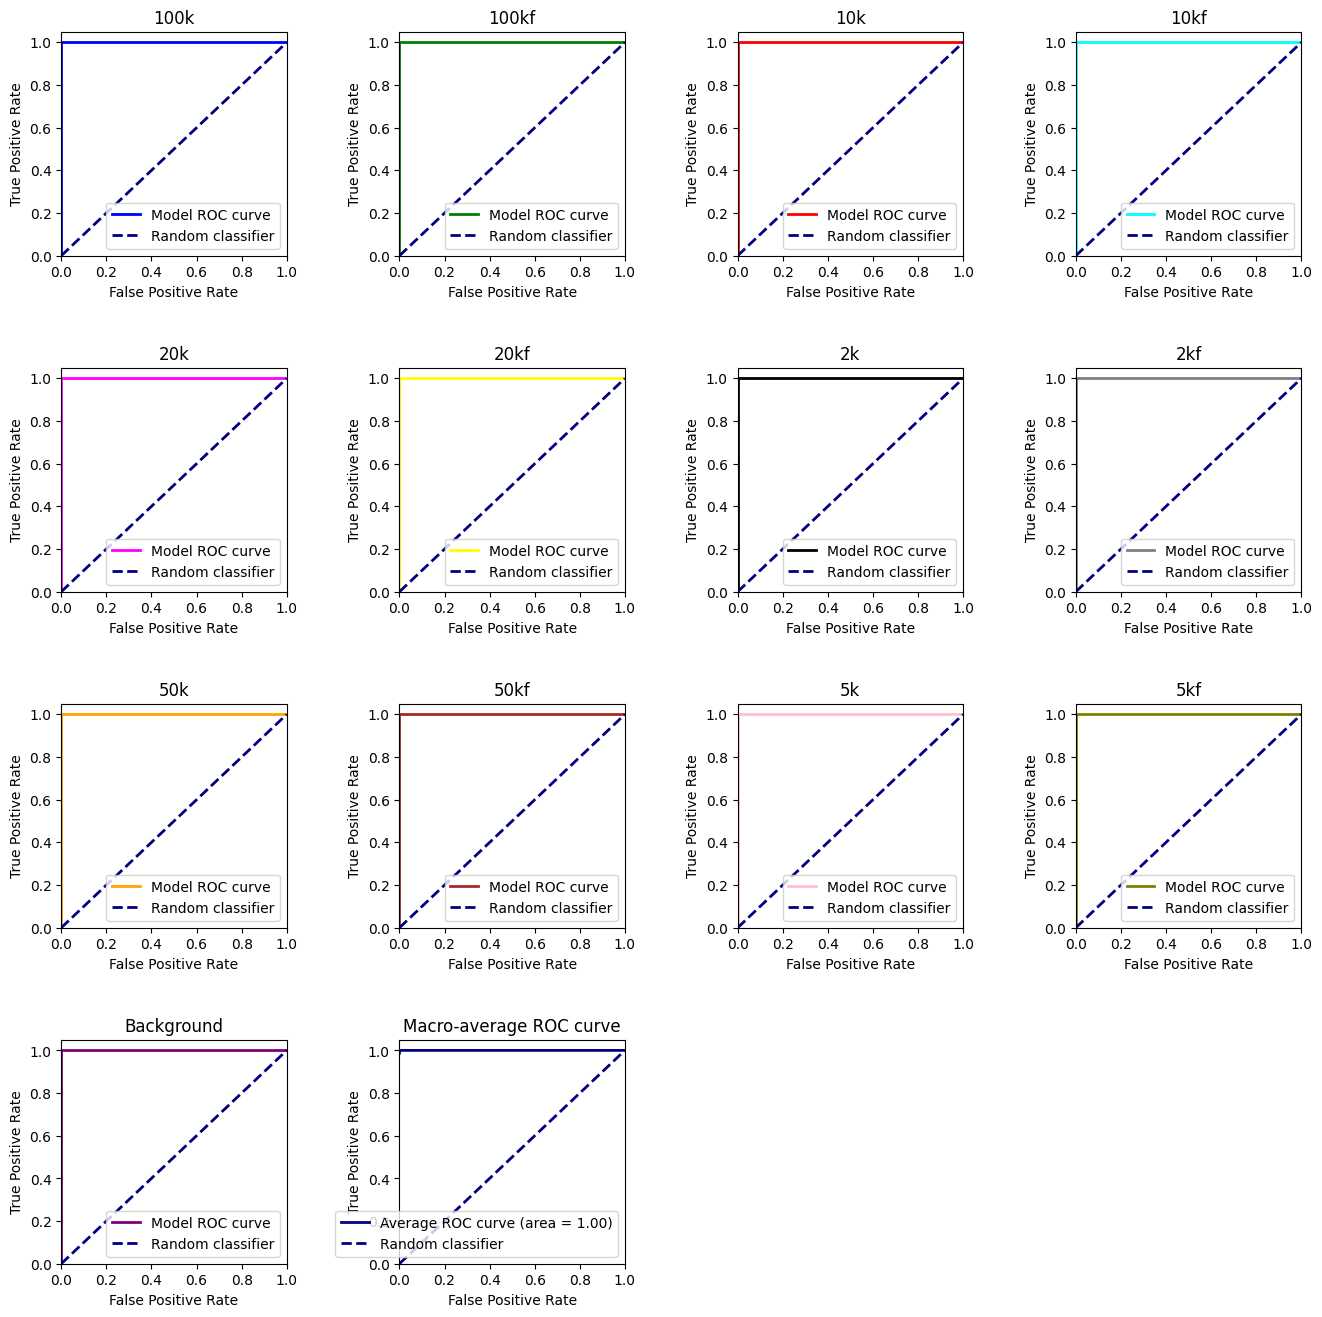

In [6]:
cf.precision_recall_metrics(model, test_ds, class_names)